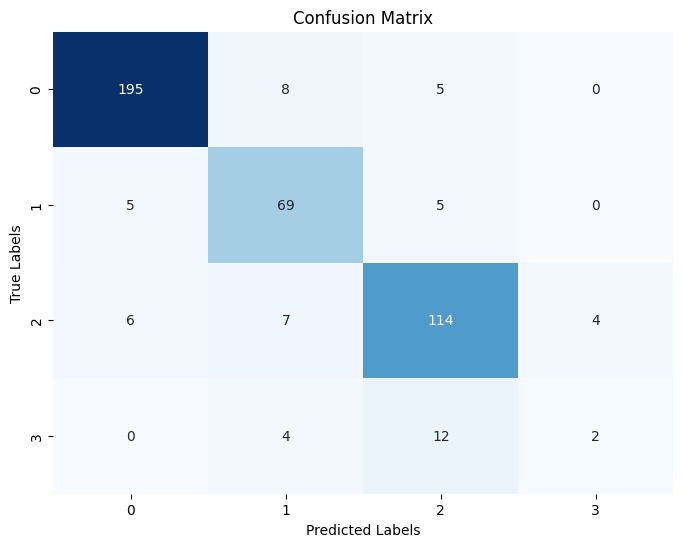

Accuracy: 0.8715596330275229
Precision: 0.8592780028235979
Recall: 0.8715596330275229
F1 Score: 0.8625886115839028
AUC: 0.8261363015227222
V Score: 0.8013287230427795
Confusion Matrix:
[[195   8   5   0]
 [  5  69   5   0]
 [  6   7 114   4]
 [  0   4  12   2]]


In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the existing dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\Feature Selection\Recursive Feature Elimination(RFE)\selected_dataset.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Gather additional data (assuming you have another dataset stored in 'additional_dataset.csv')
additional_dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\Feature Selection\L1 Regularization\dataset_NoPCA.csv'
additional_df = pd.read_csv(additional_dataset_path)

# Concatenate additional data with existing data
X = pd.concat([X, additional_df.drop('classification', axis=1)])
y = pd.concat([y, additional_df['classification']])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for decision tree classifier
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_classifier = dt_grid_search.best_estimator_

# Define the individual decision tree classifiers with the best parameters
clf1 = DecisionTreeClassifier(max_depth=dt_best_classifier.max_depth,
                              min_samples_split=dt_best_classifier.min_samples_split,
                              min_samples_leaf=dt_best_classifier.min_samples_leaf,
                              random_state=42)

# Create the Voting Classifier with decision trees
voting_clf = VotingClassifier(estimators=[('clf1', clf1)], voting='hard')

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred = voting_clf.predict(X_test)

# Calculate accuracy, precision, recall, F1 score, AUC, and V score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(pd.get_dummies(y_test).values, pd.get_dummies(y_pred).values, multi_class='ovr')
v_score = matthews_corrcoef(y_test, y_pred)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("V Score:", v_score)
print("Confusion Matrix:")
print(confusion_mat)

